In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import seaborn as sns
%matplotlib inline
#from pandas_profiling import ProfileReport


In [124]:
df = pd.read_csv('Dataset_Completo.csv')
df

,Raza,Altura (cm),Peso (kg),Inteligencia (%),Coste total (€),Vida promedio (años),Nº Enfermedades graves,Coste anual promedio (€),Hogar,Trucos,Actividad física del dueño,Distrito
0,Chihuahua,13.0,2.5,16.0,19722,16.20,2,1198,Apartamento pequeño,No,Frecuente,Carabanchel
1,Chihuahua,13.5,2.2,16.0,19630,16.80,1,1192,Jardín Amplio,No,Nada,Salamanca
2,Chihuahua,13.2,2.1,16.0,19650,16.40,2,1195,Apartamento pequeño,No,Poco frecuente,Salamanca
3,Chihuahua,13.3,2.3,16.0,19700,16.70,1,1190,Apartamento mediano,No,Muy frecuente,Chamartín
4,Chihuahua,12.8,2.4,16.0,19730,16.10,2,1199,Jardín Amplio,Sí,Frecuente,Puente de Vallecas
...,...,...,...,...,...,...,...,...,...,...,...,...
205,Schnauzer Miniatura,33.6,7.8,87.0,14505,11.79,3,1221,Jardín Amplio,No,Nada,Centro
206,Schnauzer Miniatura,33.3,7.4,87.0,14482,11.81,2,1226,Finca,Sí,Muy frecuente,Hortaleza
207,Schnauzer Miniatura,32.8,7.9,87.0,14457,11.85,3,1230,Apartamento pequeño,No,Frecuente,Ciudad Lineal
208,Schnauzer Miniatura,33.9,6.5,87.0,14512,11.78,2,1220,Jardín Amplio,Sí,Poco frecuente,Fuencarral-El Pardo


In [125]:
df[df['Raza']=='Caniche']

,Raza,Altura (cm),Peso (kg),Inteligencia (%),Coste total (€),Vida promedio (años),Nº Enfermedades graves,Coste anual promedio (€),Hogar,Trucos,Actividad física del dueño,Distrito
20,Caniche,41.0,25.0,99.0,15898,11.95,2,1330,Jardín Amplio,Sí,Nada,Villa de Vallecas
21,Caniche,40.5,25.5,99.0,15910,11.94,1,1328,Apartamento mediano,No,Frecuente,Latina
22,Caniche,41.2,24.8,99.0,15890,11.97,2,1331,Jardín Amplio,Sí,Poco frecuente,Hortaleza
23,Caniche,41.4,25.2,99.0,15905,11.96,1,1329,Apartamento pequeño,No,Muy frecuente,Fuencarral-El Pardo
24,Caniche,41.1,24.7,99.0,15885,11.98,2,1332,Jardín Amplio,Sí,Frecuente,Usera
25,Caniche,41.6,25.8,99.0,15920,11.93,1,1327,Apartamento mediano,Sí,Poco frecuente,Villa de Vallecas
26,Caniche,41.3,25.4,99.0,15902,11.95,2,1333,Finca,No,Nada,Centro
27,Caniche,40.8,25.9,99.0,15878,11.99,1,1334,Jardín Amplio,No,Nada,Puente de Vallecas
28,Caniche,41.9,24.5,99.0,15930,11.92,2,1326,Apartamento pequeño,Sí,Muy frecuente,Carabanchel
29,Caniche,41.7,25.6,99.0,15915,11.94,1,1335,Jardín Amplio,No,Frecuente,Latina


In [126]:
df.dtypes

Raza                           object
Altura (cm)                   float64
Peso (kg)                     float64
Inteligencia (%)              float64
Coste total (€)                 int64
Vida promedio (años)          float64
Nº Enfermedades graves          int64
Coste anual promedio (€)        int64
Hogar                          object
Trucos                         object
Actividad física del dueño     object
Distrito                       object
dtype: object

In [127]:
df['Raza'].unique()

array(['Chihuahua', 'Springer Spaniel Inglés', 'Caniche',
       'Braco Alemán de pelo corto', 'Labrador Retriever',
       'Bichón Maltés', 'Pomerania', 'Golden Retriever', 'Beagle',
       'Setter Inglés', 'Doberman Pinscher',
       'Cavalier King Charles Spaniel', 'Rottweiler', 'Pastor Alemán',
       'Bulldog Francés', 'Gran Danés', 'Bulldog', 'Border Collie',
       'Husky Siberiano', 'Dachshund', 'Schnauzer Miniatura'],
      dtype=object)

In [128]:
df2 = pd.read_csv('info_distritos_madrid.csv',sep=',')
df2
df2 = df2[['Distrito', 'Renta media/pers (€)','Áreas caninas (m²)']]
df2

,Distrito,Renta media/pers (€),Áreas caninas (m²)
0,Fuencarral-El Pardo,20671,1852
1,Moncloa-Aravaca,24659,2606
2,Latina,13719,1802
3,Carabanchel,12275,2794
4,Usera,10797,2971
5,Villaverde,11059,844
6,Puente de Vallecas,10941,3843
7,Villa de Vallecas,13605,1140
8,Moratalaz,15667,2838
9,Vicálvaro,13849,4410


In [129]:
df_merge = pd.merge(df, df2, how='left', on='Distrito')
df_merge.sort_index()

,Raza,Altura (cm),Peso (kg),Inteligencia (%),Coste total (€),Vida promedio (años),Nº Enfermedades graves,Coste anual promedio (€),Hogar,Trucos,Actividad física del dueño,Distrito,Renta media/pers (€),Áreas caninas (m²)
0,Chihuahua,13.0,2.5,16.0,19722,16.20,2,1198,Apartamento pequeño,No,Frecuente,Carabanchel,12275,2794
1,Chihuahua,13.5,2.2,16.0,19630,16.80,1,1192,Jardín Amplio,No,Nada,Salamanca,25956,623
2,Chihuahua,13.2,2.1,16.0,19650,16.40,2,1195,Apartamento pequeño,No,Poco frecuente,Salamanca,25956,623
3,Chihuahua,13.3,2.3,16.0,19700,16.70,1,1190,Apartamento mediano,No,Muy frecuente,Chamartín,28233,165
4,Chihuahua,12.8,2.4,16.0,19730,16.10,2,1199,Jardín Amplio,Sí,Frecuente,Puente de Vallecas,10941,3843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,Schnauzer Miniatura,33.6,7.8,87.0,14505,11.79,3,1221,Jardín Amplio,No,Nada,Centro,19199,326
206,Schnauzer Miniatura,33.3,7.4,87.0,14482,11.81,2,1226,Finca,Sí,Muy frecuente,Hortaleza,20500,3852
207,Schnauzer Miniatura,32.8,7.9,87.0,14457,11.85,3,1230,Apartamento pequeño,No,Frecuente,Ciudad Lineal,16890,614
208,Schnauzer Miniatura,33.9,6.5,87.0,14512,11.78,2,1220,Jardín Amplio,Sí,Poco frecuente,Fuencarral-El Pardo,20671,1852


In [130]:
df_merge = df_merge.drop(columns=['Coste total (€)'])
df_merge.to_csv('perretes.csv', sep=',', index=False)

In [131]:
df_merge['Distrito'].value_counts()

Distrito
Puente de Vallecas     18
Carabanchel            15
Fuencarral-El Pardo    15
Latina                 14
Ciudad Lineal          13
Hortaleza              12
Centro                 12
San Blas-Canillejas    11
Chamberí               10
Moncloa-Aravaca        10
Salamanca              10
Chamartín               9
Villaverde              9
Usera                   9
Tetuán                  9
Arganzuela              8
Villa de Vallecas       7
Retiro                  6
Moratalaz               5
Vicálvaro               4
Barajas                 4
Name: count, dtype: int64

In [132]:
from sklearn.preprocessing import OneHotEncoder
# One hot encoding
# Trans
enc = OneHotEncoder(handle_unknown='ignore' ,sparse=False)
enc.fit_transform(df_merge[['Trucos']])

df_merge.loc[:,'Trucos'] = enc.fit_transform(df_merge[['Trucos']])[:,0]

c:\Users\anape\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\anape\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [133]:
from sklearn.preprocessing import OrdinalEncoder

# Inicializar el OrdinalEncoder
categories_hogar = ['Apartamento pequeño', 'Apartamento mediano', 'Jardín Amplio', 'Finca']
categories_act = ['Nada', 'Poco frecuente', 'Frecuente', 'Muy frecuente']

encoder = OrdinalEncoder(categories=[categories_hogar, categories_act])
data_encoded= encoder.fit_transform(df_merge[['Hogar', 'Actividad física del dueño']])

df_merge[['Hogar_enc', 'Act.f_enc']] = data_encoded

# Muestra el DataFrame con la codificación ordinal
df_merge

# Ajustar y transformar los datos en la columna categórica
# df_merge['Raza'] = ordinal_encoder.fit_transform(df_merge[['Raza']])
# df_merge['Hogar'] = ordinal_encoder.fit_transform(df_merge[['Hogar']])
# df_merge['Actividad física del dueño'] = ordinal_encoder.fit_transform(df_merge[['Actividad física del dueño']])

,Raza,Altura (cm),Peso (kg),Inteligencia (%),Vida promedio (años),Nº Enfermedades graves,Coste anual promedio (€),Hogar,Trucos,Actividad física del dueño,Distrito,Renta media/pers (€),Áreas caninas (m²),Hogar_enc,Act.f_enc
0,Chihuahua,13.0,2.5,16.0,16.20,2,1198,Apartamento pequeño,1.0,Frecuente,Carabanchel,12275,2794,0.0,2.0
1,Chihuahua,13.5,2.2,16.0,16.80,1,1192,Jardín Amplio,1.0,Nada,Salamanca,25956,623,2.0,0.0
2,Chihuahua,13.2,2.1,16.0,16.40,2,1195,Apartamento pequeño,1.0,Poco frecuente,Salamanca,25956,623,0.0,1.0
3,Chihuahua,13.3,2.3,16.0,16.70,1,1190,Apartamento mediano,1.0,Muy frecuente,Chamartín,28233,165,1.0,3.0
4,Chihuahua,12.8,2.4,16.0,16.10,2,1199,Jardín Amplio,0.0,Frecuente,Puente de Vallecas,10941,3843,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,Schnauzer Miniatura,33.6,7.8,87.0,11.79,3,1221,Jardín Amplio,1.0,Nada,Centro,19199,326,2.0,0.0
206,Schnauzer Miniatura,33.3,7.4,87.0,11.81,2,1226,Finca,0.0,Muy frecuente,Hortaleza,20500,3852,3.0,3.0
207,Schnauzer Miniatura,32.8,7.9,87.0,11.85,3,1230,Apartamento pequeño,1.0,Frecuente,Ciudad Lineal,16890,614,0.0,2.0
208,Schnauzer Miniatura,33.9,6.5,87.0,11.78,2,1220,Jardín Amplio,0.0,Poco frecuente,Fuencarral-El Pardo,20671,1852,2.0,1.0


In [134]:
X = df_merge.drop(columns=['Raza','Distrito','Altura (cm)', 'Vida promedio (años)','Coste total (€)', 'Nº Enfermedades graves', 'Hogar', 'Actividad física del dueño'])
y = df_merge['Raza']
y

KeyError: "['Coste total (€)'] not found in axis"

In [ ]:
X.columns

Index(['Peso (kg)', 'Inteligencia (%)', 'Coste anual promedio (€)', 'Trucos',
       'Renta media/pers (€)', 'Áreas caninas (m²)', 'Hogar_enc', 'Act.f_enc'],
      dtype='object')

In [ ]:
y

0                Chihuahua
1                Chihuahua
2                Chihuahua
3                Chihuahua
4                Chihuahua
              ...         
205    Schnauzer Miniatura
206    Schnauzer Miniatura
207    Schnauzer Miniatura
208    Schnauzer Miniatura
209    Schnauzer Miniatura
Name: Raza, Length: 210, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42, stratify=y)

In [ ]:
y_train.value_counts()

Raza
Golden Retriever                 7
Husky Siberiano                  7
Bulldog Francés                  7
Border Collie                    7
Beagle                           7
Chihuahua                        7
Pastor Alemán                    7
Braco Alemán de pelo corto       7
Rottweiler                       7
Springer Spaniel Inglés          7
Pomerania                        7
Bichón Maltés                    7
Dachshund                        7
Schnauzer Miniatura              7
Gran Danés                       6
Setter Inglés                    6
Caniche                          6
Labrador Retriever               6
Cavalier King Charles Spaniel    6
Bulldog                          6
Doberman Pinscher                6
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler

grid_params = {
    'tree__max_depth' : range (1,100,5),
    #'tree__min_samples_split': np.linspace(0.05, 0.5, 5)
    }

pipe = Pipeline([('scaler', MinMaxScaler()), ('tree', DecisionTreeClassifier())]) #para algunos modelos es necesarios escalar
#y para otros modelos no. Pero, como minmaxscaler no modifica distribución, no pasa nada porque se haga siempre (si no sabemos qué modelo vamos a entrenar)

#gs = GridSearchCV(KNeighborsClassifier(), grid_params, cv = 5, verbose=1, scoring= 'precision',return_train_score=False)
gs = GridSearchCV(pipe, grid_params, cv = 3, verbose=1, scoring= 'precision_weighted',return_train_score=True)

In [ ]:
gs.fit(X,y)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\Users\anape\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anape\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anape\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\U

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('tree', DecisionTreeClassifier())]),
             param_grid={'tree__max_depth': range(1, 100, 5)},
             return_train_score=True, scoring='precision_weighted', verbose=1)

In [ ]:
gs.best_params_ 
# gs.best_estimator_

{'tree__max_depth': 16}

In [ ]:
pd.DataFrame.from_dict(gs.cv_results_['params'])

,tree__max_depth
0,1
1,6
2,11
3,16
4,21
5,26
6,31
7,36
8,41
9,46


In [ ]:
results = pd.merge(pd.DataFrame(gs.cv_results_), pd.DataFrame.from_dict(gs.cv_results_['params']), left_index=True, right_index=True)
results.head(2)
             

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_tree__max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score,tree__max_depth
0,0.014268,0.010353,0.014984,0.005294,1,{'tree__max_depth': 1},0.044776,0.044776,0.044776,0.044776,6.938894e-18,20,0.052632,0.052632,0.052632,0.052632,0.000000,1
1,0.020826,0.002952,0.019718,0.015082,6,{'tree__max_depth': 6},0.285593,0.281366,0.259615,0.275525,1.138123e-02,19,0.353846,0.329167,0.303571,0.328861,0.020526,6


In [ ]:
X.columns

Index(['Peso (kg)', 'Inteligencia (%)', 'Coste anual promedio (€)', 'Trucos',
       'Renta media/pers (€)', 'Áreas caninas (m²)', 'Hogar_enc', 'Act.f_enc'],
      dtype='object')

In [ ]:
gs.best_estimator_

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('tree', DecisionTreeClassifier(max_depth=16))])

In [ ]:
gs.best_estimator_.feature_importance

AttributeError: 'Pipeline' object has no attribute 'feature_importance'

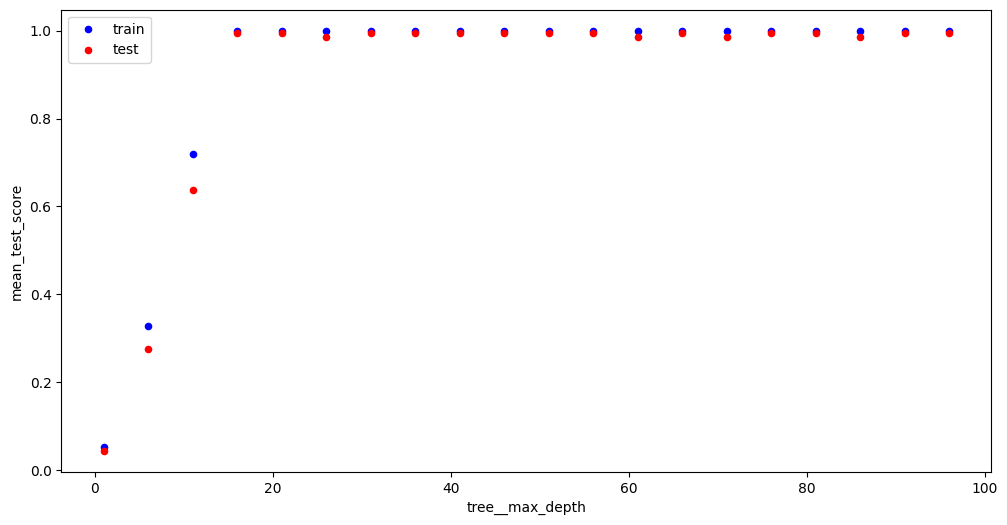

In [ ]:
col = 'tree__max_depth'
fig, ax= plt.subplots(figsize=(12,6))
results.plot.scatter(col,'mean_train_score', ax=ax, label='train', color='b')
results.plot.scatter(col,'mean_test_score', ax=ax, label='test', color='r')
plt.legend()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler

grid_params = {
    'tree__max_depth' : range (15,24),
    #'tree__min_samples_split': np.linspace(0.05, 0.5, 5)
    }

pipe = Pipeline([('scaler', MinMaxScaler()), ('tree', DecisionTreeClassifier())]) #para algunos modelos es necesarios escalar
#y para otros modelos no. Pero, como minmaxscaler no modifica distribución, no pasa nada porque se haga siempre (si no sabemos qué modelo vamos a entrenar)

#gs = GridSearchCV(KNeighborsClassifier(), grid_params, cv = 5, verbose=1, scoring= 'precision',return_train_score=False)
gs = GridSearchCV(pipe, grid_params, cv = 3, verbose=1, scoring= 'precision_weighted',return_train_score=True)

In [ ]:
gs.fit(X,y)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('tree', DecisionTreeClassifier())]),
             param_grid={'tree__max_depth': range(15, 24)},
             return_train_score=True, scoring='precision_weighted', verbose=1)

In [ ]:
gs.best_params_ 

{'tree__max_depth': 18}

In [ ]:
pd.DataFrame.from_dict(gs.cv_results_['params'])

,tree__max_depth
0,18
1,19
2,20
3,21


In [ ]:
results = pd.merge(pd.DataFrame(gs.cv_results_), pd.DataFrame.from_dict(gs.cv_results_['params']), left_index=True, right_index=True)
results.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_tree__max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score,tree__max_depth
0,0.034500,0.009503,0.022456,0.002447,15,{'tree__max_depth': 15},0.982857,1.0,0.971429,0.984762,0.011742,4,1.0,1.0,1.0,1.0,0.0,15
1,0.020769,0.005264,0.012043,0.005167,16,{'tree__max_depth': 16},0.982857,1.0,0.971429,0.984762,0.011742,4,1.0,1.0,1.0,1.0,0.0,16


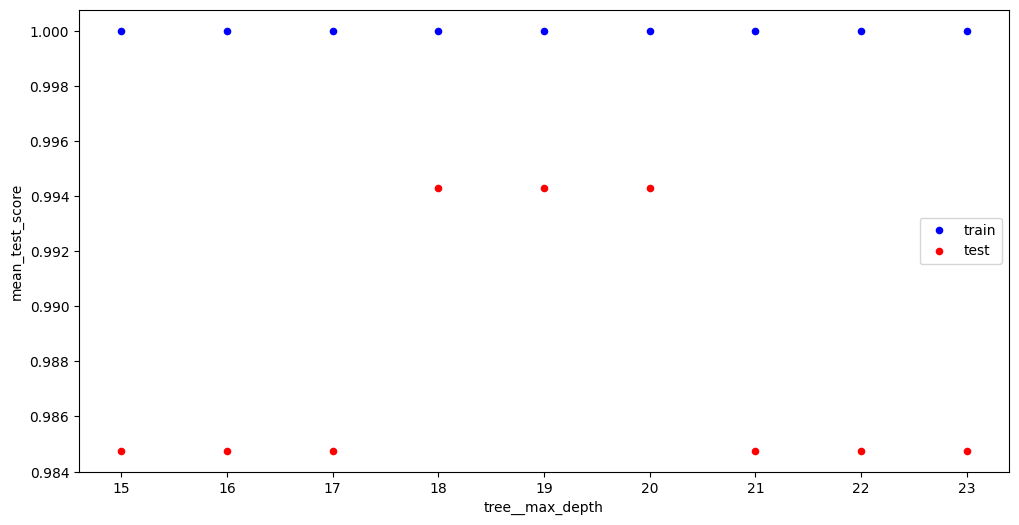

In [ ]:
col = 'tree__max_depth'
fig, ax= plt.subplots(figsize=(12,6))
results.plot.scatter(col,'mean_train_score', ax=ax, label='train', color='b')
results.plot.scatter(col,'mean_test_score', ax=ax, label='test', color='r')
plt.legend()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler

grid_params = {
    'tree__max_depth' : range (15,24),
    'tree__min_samples_split': np.linspace(0.05, 0.5, 5)
    }

pipe = Pipeline([('scaler', MinMaxScaler()), ('tree', DecisionTreeClassifier())]) #para algunos modelos es necesarios escalar
#y para otros modelos no. Pero, como minmaxscaler no modifica distribución, no pasa nada porque se haga siempre (si no sabemos qué modelo vamos a entrenar)

#gs = GridSearchCV(KNeighborsClassifier(), grid_params, cv = 5, verbose=1, scoring= 'precision',return_train_score=False)
gs = GridSearchCV(pipe, grid_params, cv = 3, verbose=1, scoring= 'recall_weighted',return_train_score=True)

In [ ]:
gs.fit(X,y)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('tree', DecisionTreeClassifier())]),
             param_grid={'tree__max_depth': range(15, 24),
                         'tree__min_samples_split': array([0.05  , 0.1625, 0.275 , 0.3875, 0.5   ])},
             return_train_score=True, scoring='recall_weighted', verbose=1)

In [ ]:
pd.DataFrame.from_dict(gs.cv_results_['params'])

,tree__max_depth,tree__min_samples_split
0,15,0.0500
1,15,0.1625
2,15,0.2750
3,15,0.3875
4,15,0.5000
5,16,0.0500
6,16,0.1625
7,16,0.2750
8,16,0.3875
9,16,0.5000


KeyError: 'tree__min_samples_split'

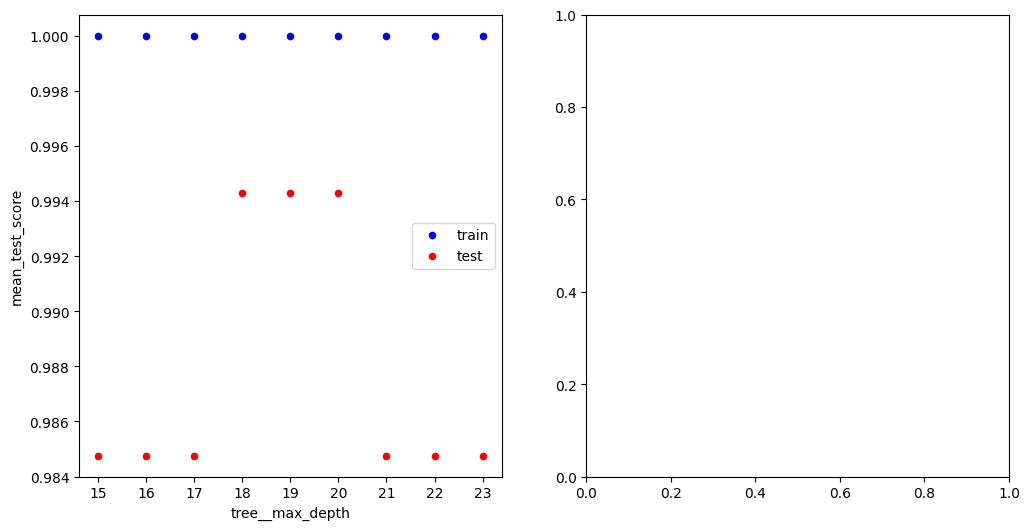

In [ ]:
col1 = 'tree__max_depth'
col2 = 'tree__min_samples_split'
fig, ax= plt.subplots(figsize=(12,6), nrows=1, ncols=2)
results.plot.scatter(col1,'mean_train_score', ax=ax[0], label='train', color='b')
results.plot.scatter(col1,'mean_test_score', ax=ax[0], label='test', color='r')
results.plot.scatter(col2,'mean_train_score', ax=ax[1], label='train', color='b')
results.plot.scatter(col2,'mean_test_score', ax=ax[1], label='test', color='r')
plt.legend()